In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
restaurant = pd.read_csv("Restaurant.csv")
print (restaurant.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [51]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [52]:
restaurant.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [53]:
restaurant.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [54]:
restaurant.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Task 1: Restaurant Ratings

#### Analyze the distribution of aggregate ratings and determine the most common rating rangee.

In [55]:
rating_counts = restaurant['Aggregate rating'].value_counts()

In [56]:
print("rating_counts:")
for rating, count in sorted(rating_counts.items()):
    print(f"{rating} stars: {count}")

rating_counts:
0.0 stars: 2148
1.8 stars: 1
1.9 stars: 2
2.0 stars: 7
2.1 stars: 15
2.2 stars: 27
2.3 stars: 47
2.4 stars: 87
2.5 stars: 110
2.6 stars: 191
2.7 stars: 250
2.8 stars: 315
2.9 stars: 381
3.0 stars: 468
3.1 stars: 519
3.2 stars: 522
3.3 stars: 483
3.4 stars: 498
3.5 stars: 480
3.6 stars: 458
3.7 stars: 427
3.8 stars: 400
3.9 stars: 335
4.0 stars: 266
4.1 stars: 274
4.2 stars: 221
4.3 stars: 174
4.4 stars: 144
4.5 stars: 95
4.6 stars: 78
4.7 stars: 42
4.8 stars: 25
4.9 stars: 61


In [57]:
max_aggregate_rating = rating_counts.idxmax()
highest_count = rating_counts.max()
print(f"\nThe most common rating is {max_aggregate_rating} stars with {highest_count} occurrences.")


The most common rating is 0.0 stars with 2148 occurrences.


### Calculate the average number of votes received by restaurants.

In [58]:
total_votes = restaurant['Votes'].value_counts()

In [59]:
total_restaurants = len('Votes')

In [60]:
average_votes_per_restaurant = total_votes / total_restaurants

In [61]:
print(f"The average number of votes received by restaurants is {average_votes_per_restaurant}.")

The average number of votes received by restaurants is Votes
0      218.8
1       96.6
2       65.4
3       48.8
4       41.4
       ...  
615      0.2
538      0.2
823      0.2
650      0.2
901      0.2
Name: count, Length: 1012, dtype: float64.


### Task 2: Cuisine Combination

In [62]:
# identify the most common combinations of cuisines in the dataset
restaurant.dropna(subset=['Cuisines'], inplace=True)

restaurant['Cuisine'] = restaurant['Cuisines'].apply(lambda x: sorted(x.strip().split(',')))

restaurant['Cuisine'] = restaurant['Cuisines'].apply(tuple)

cuisine_combination_counts = restaurant['Cuisines'].value_counts()

print("Most common combinations of cuisines:")
print(cuisine_combination_counts.head())

Most common combinations of cuisines:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64


In [63]:
restaurant.dropna(subset=['Cuisines'], inplace=True)
restaurant['Cuisine'] = restaurant['Cuisines'].apply(lambda x: sorted(x.strip().split(',')))
restaurant['Cuisine'] = restaurant['Cuisines'].apply(tuple)
average_rating_by_combination = restaurant.groupby('Cuisines')['Aggregate rating'].mean()
sorted_cuisines = average_rating_by_combination.sort_values(ascending=False)
print("Cuisines with high ratings:")
print(sorted_cuisines.head(20))

Cuisines with high ratings:
Cuisines
Italian, Deli                      4.90
Hawaiian, Seafood                  4.90
American, Sandwich, Tea            4.90
Continental, Indian                4.90
European, Asian, Indian            4.90
European, Contemporary             4.90
European, German                   4.90
BBQ, Breakfast, Southern           4.90
American, Coffee and Tea           4.90
Sunda, Indonesian                  4.90
American, Burger, Grill            4.90
Mughlai, Lucknowi                  4.90
Mexican, American, Healthy Food    4.90
American, Caribbean, Seafood       4.90
Burger, Bar Food, Steak            4.90
Italian, Bakery, Continental       4.90
World Cuisine                      4.90
American, BBQ, Sandwich            4.90
Filipino, Mexican                  4.85
Italian, American, Pizza           4.80
Name: Aggregate rating, dtype: float64


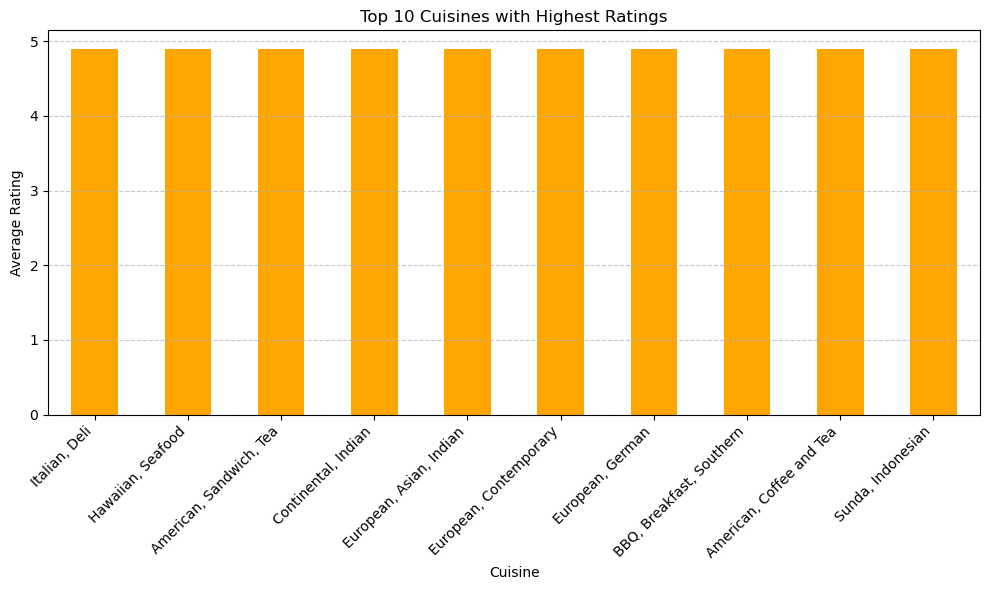

In [64]:
plt.figure(figsize=(10, 6))
sorted_cuisines.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Cuisines with Highest Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 3: Geographical Analysis

In [65]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


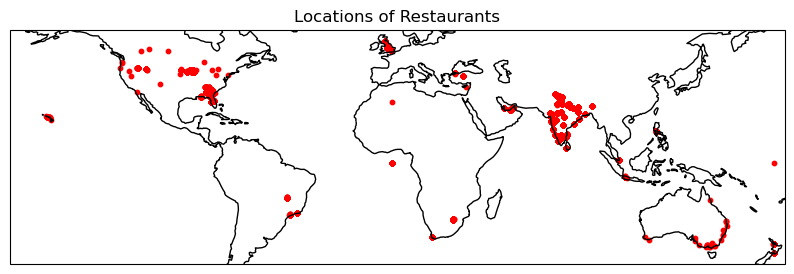

In [66]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
restaurant.dropna(subset=['Latitude', 'Longitude'], inplace=True)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.scatter(restaurant['Longitude'], restaurant['Latitude'], color='red', marker='o', s=10, transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Locations of Restaurants')
plt.show()

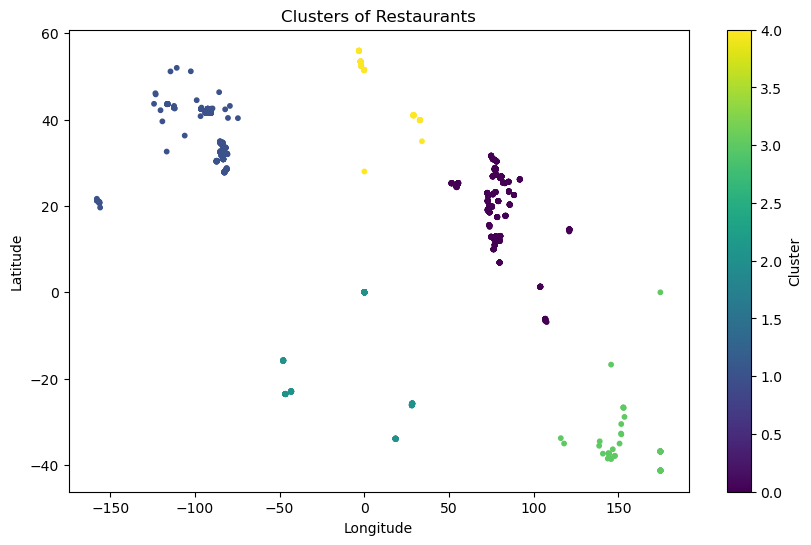

In [8]:
restaurant.dropna(subset=['Latitude', 'Longitude'], inplace=True)
X = restaurant[['Latitude', 'Longitude']]
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
restaurant['cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(restaurant['Longitude'], restaurant['Latitude'], c=restaurant['cluster'], cmap='viridis', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Restaurants')
plt.colorbar(label='Cluster')
plt.show()

### Task 4: Restaurant Chains

In [68]:
# Identify if there are any restaurant chains present in the dataset.
restaurant_names = restaurant['Restaurant Name']
restaurant_name_counts = restaurant_names.value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1]
print("Potential restaurant chains:")
print(chains)

Potential restaurant chains:
Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64
